In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CoC_04 = pd.read_csv('../data/processed/CoC_04.csv')
CoC_05 = pd.read_csv('../data/processed/CoC_05.csv')
CoC_06 = pd.read_csv('../data/processed/CoC_06.csv')
CoC_07 = pd.read_csv('../data/processed/CoC_07.csv')

for name, df in [('CoC_04', CoC_04), ('CoC_05', CoC_05), ('CoC_06', CoC_06), ('CoC_07', CoC_07)]:
    print(f"\n{name} shape: {df.shape}")
    print(df.head(3))



CoC_04 shape: (32, 5)
   id  Quarter  Male  Female  Recorded as Unknown
0   1  2017 Q3   116     247                    0
1   2  2017 Q4   206     536                    0
2   3  2018 Q1   193     515                    0

CoC_05 shape: (33, 6)
   id  Quarter  Claim Pending  Claim Accepted  Claim Rejected  Grand Total
0   1  2017 Q3              0             148             215          363
1   2  2017 Q4              0             402             340          742
2   3  2018 Q1              0             351             357          708

CoC_06 shape: (36474, 8)
   id Quarter Cohort Nationality  Gender Age Group          Status  \
0   1        2017 Q3    Pakistan  Female  Under 18  Claim Rejected   
1   2        2017 Q3     Nigeria  Female  Under 18  Claim Rejected   
2   3        2017 Q3     Nigeria  Female  41 to 50  Claim Rejected   

   Days to Decision  Count  
0              55.0      1  
1               0.0      1  
2              63.0      1  

CoC_07 shape: (32, 7)
   id  Q

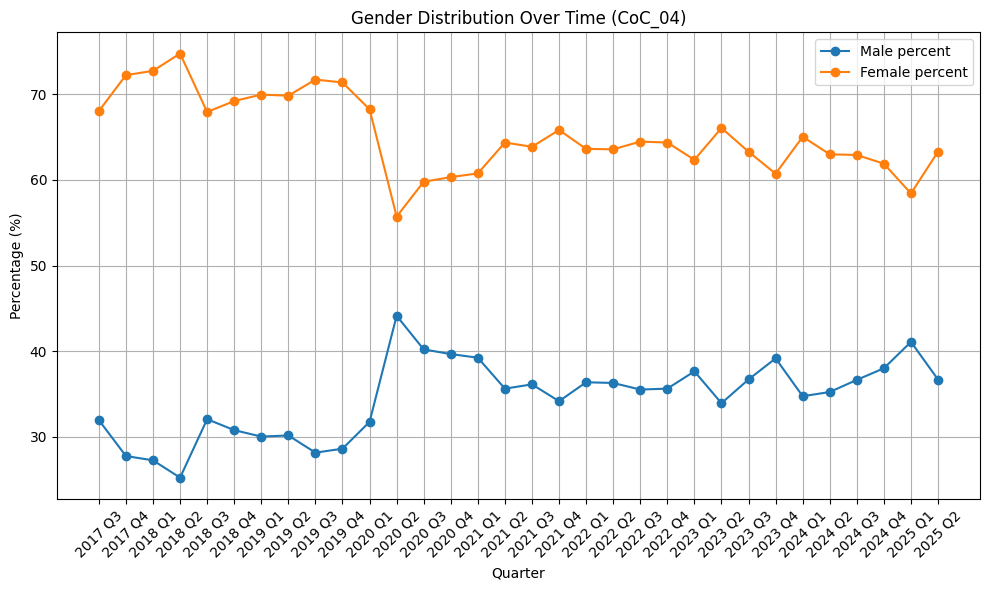

In [6]:
CoC_04['Total'] = CoC_04['Male'] + CoC_04['Female'] + CoC_04['Recorded as Unknown']

CoC_04['Male percent'] = CoC_04['Male'] / CoC_04['Total'] * 100
CoC_04['Female percent'] = CoC_04['Female'] / CoC_04['Total'] * 100

plt.figure(figsize=(10, 6))
plt.plot(CoC_04['Quarter'], CoC_04['Male percent'], marker='o', label='Male percent')
plt.plot(CoC_04['Quarter'], CoC_04['Female percent'], marker='o', label='Female percent')

plt.title('Gender Distribution Over Time (CoC_04)')
plt.xlabel('Quarter')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

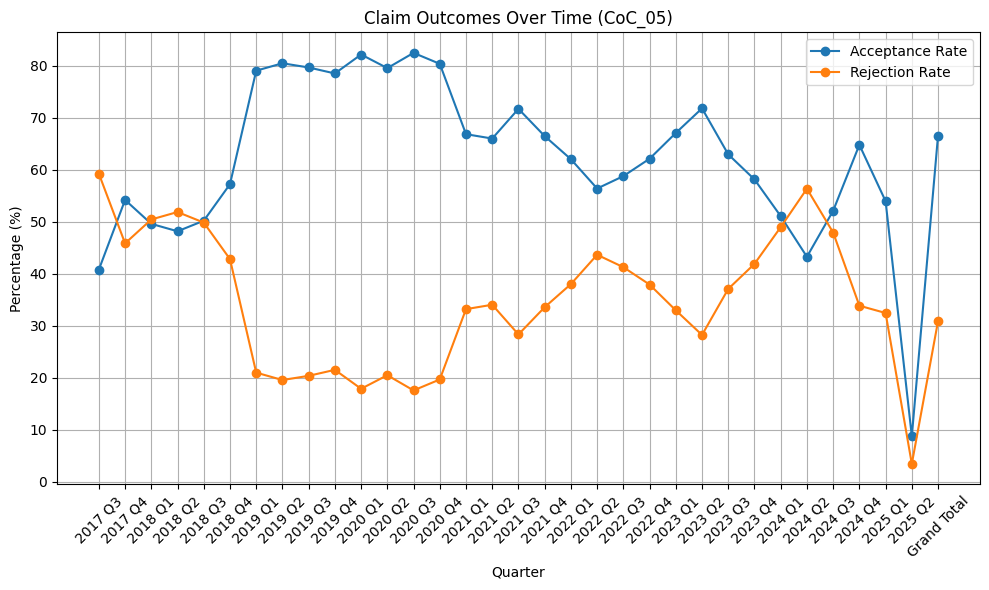

In [8]:
CoC_05.rename(columns={'Claim Accepted': 'Accepted', 'Claim Rejected': 'Rejected', 'Grand Total': 'Total'}, inplace=True)
CoC_05.head(3)

CoC_05['Acceptance Rate'] = CoC_05['Accepted'] / CoC_05['Total'] * 100
CoC_05['Rejection Rate'] = CoC_05['Rejected'] / CoC_05['Total'] * 100

plt.figure(figsize=(10, 6))
plt.plot(CoC_05['Quarter'], CoC_05['Acceptance Rate'], marker='o', label='Acceptance Rate')
plt.plot(CoC_05['Quarter'], CoC_05['Rejection Rate'], marker='o', label='Rejection Rate')

plt.title('Claim Outcomes Over Time (CoC_05)')
plt.xlabel('Quarter')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()